**Regression analyses of degradation rate against enzyme production rate**

- Data derived from the runs with differing enzyme production rates for 300 days;
- Fit with the ECA model;
- Use the nls() function;

In [1]:
options(repr.plot.width = 4, repr.plot.height = 4)
options(jupyter.plot_mimetypes = "image/png")

## load in the data

In [2]:
cellulose <- read.csv('Cellulose.csv')
head(cellulose)

X,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
0,147.2924,0.000000e+00,0.0000000000,3e-04,147.29240
1,147.2922,1.189091e-05,0.0001780127,3e-04,73.64620
2,147.2919,2.272700e-05,0.0003402255,3e-04,49.09747
3,147.2914,3.264854e-05,0.0004887281,3e-04,36.82310
4,147.2908,4.177277e-05,0.0006252684,3e-04,29.45848
5,147.2900,5.010629e-05,0.0007499398,3e-04,24.54873


### Fitting with ECA
**use the Enz_rate to index differing enzyme production rate**

In [3]:
cellulose_15 = cellulose[cellulose$Enz_rate == 1.5e-04,]
tail(cellulose_15)

,X,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
2095,2094,0.0006209641,0.07937958,1.472774e-05,0.00015,0.4992963
2096,2095,0.0006069876,0.07715355,1.397658e-05,0.00015,0.4976095
2097,2096,0.0005937217,0.07498573,1.326585e-05,0.00015,0.4959340
2098,2097,0.0005811203,0.07287431,1.260137e-05,0.00015,0.4942698
2099,2098,0.0005691398,0.07081911,1.198056e-05,0.00015,0.4926167
2100,2099,0.0005577410,0.06881877,1.139877e-05,0.00015,0.4909747


In [4]:
# variables
Substrate <- cellulose_15$Substrate_series
Sub_input <- cellulose_15$Subinput_rate
Enzyme <- cellulose_15$Enzyme_series
Rate <- cellulose_15$Decayrates_series
Enzyme_rate <- cellulose_15$Enz_rate

In [5]:
SS<-getInitial(Rate~SSlogis(Enzyme,alpha,xmid,scale),
               data=data.frame(Rate=Rate,Enzyme=Enzyme))

In [6]:
# Fit the logistical model with data

#we used a different parametrization
#K_start<-SS["alpha"]
#R_start<-1/SS["scale"]
#N0_start<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
#Vmax_start = SS['alpha']
#K_start<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)

#the formula for the model
log_formula<-formula(Rate ~ (Substrate*Enzyme)*Vmax/(K + Substrate + Enzyme))

#fit the model
m3 <- nls(log_formula,start=list(Vmax= 1,K=100))

#estimated parameters
summary(m3)


Formula: Rate ~ (Substrate * Enzyme) * Vmax/(K + Substrate + Enzyme)

Parameters:
     Estimate Std. Error t value Pr(>|t|)    
Vmax  30.5612     0.3379   90.44   <2e-16 ***
K    158.1958     2.4664   64.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02873 on 298 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 8.473e-07


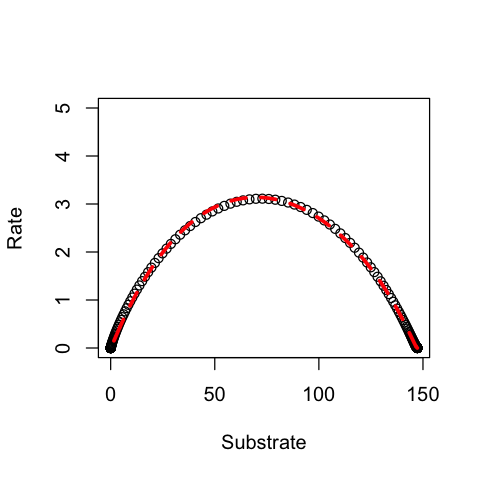

In [7]:
plot(Substrate,Rate,ylim=c(0,5))
lines(Substrate,predict(m3),col="red",lty=2,lwd=3)

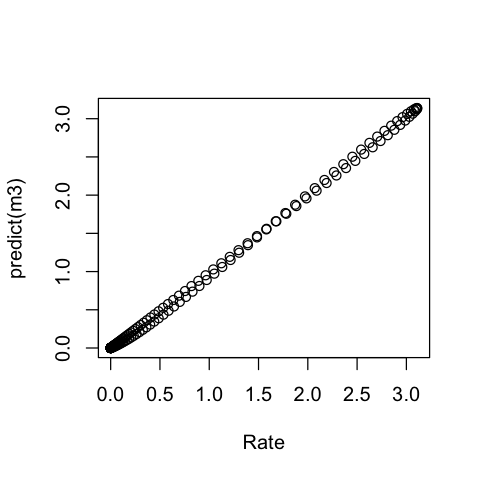

In [8]:
plot(Rate,predict(m3))

In [9]:
cor(Rate,predict(m3))

[1] 0.9995474

In [10]:
AIC(m3)

[1] -1274.561